# import libraries

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

tf.random.set_seed(777) 
print(tf.__version__)

2.1.0


# data settings

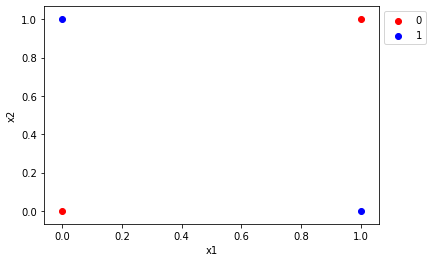

In [2]:
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]

plt.scatter(x_data[0][0],x_data[0][1], c = 'red', marker = 'o', label = '0')
plt.scatter(x_data[3][0],x_data[3][1], c = 'red', marker = 'o')
plt.scatter(x_data[1][0],x_data[1][1], c = 'blue', marker = 'o', label = '1')
plt.scatter(x_data[2][0],x_data[2][1], c = 'blue', marker = 'o')

plt.xlabel('x1')
plt.ylabel('x2')

plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1))
plt.show()

dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))

In [3]:
def preprocess_data(features, labels):
    features = tf.cast(features, tf.float32)
    labels = tf.cast(labels, tf.float32)
    return features, labels

# weight and bias settings

In [4]:
W1 = tf.Variable(tf.random.normal((2, 1)), dtype = tf.float32, name = 'weight1')
b1 = tf.Variable(tf.random.normal((1, )), dtype = tf.float32, name = 'bias1')

W2 = tf.Variable(tf.random.normal((2, 1)), dtype = tf.float32, name = 'weight2')
b2 = tf.Variable(tf.random.normal((1, )), dtype = tf.float32, name = 'bias2')

W3 = tf.Variable(tf.random.normal((2, 1)), dtype = tf.float32, name = 'weight3')
b3 = tf.Variable(tf.random.normal((1, )), dtype = tf.float32, name = 'bias3')

variables = [W1, W2, W3, b1, b2, b3]

# neural net

In [5]:
def nn(features):
    layer1 = tf.sigmoid(tf.matmul(features, W1) + b1)
    layer2 = tf.sigmoid(tf.matmul(features, W2) + b2)
    layer3 = tf.concat([layer1, layer2], -1)
    layer3 = tf.reshape(layer3, shape = [-1, 2])
    hypothesis = tf.sigmoid(tf.matmul(layer3, W3) + b3)
    return hypothesis

# cost function

In [6]:
def loss_fn(hypothesis, features, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(nn(features)) + (1 - labels) * tf.math.log(1 - hypothesis))
    return cost

# cost minimization

In [7]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01)

In [8]:
def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(nn(features), features, labels)
    return tape.gradient(loss_value, variables)

# prediction check

In [9]:
def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype = tf.float32))
    return accuracy

# train

In [10]:
EPOCHS = 50001

for step in range(EPOCHS):
    for features, labels in dataset:
        features, labels = preprocess_data(features, labels)
        grads = grad(nn(features), features, labels)
        optimizer.apply_gradients(grads_and_vars = zip(grads, variables))
        if step % 5000 == 0:
            print('iter : {}, loss : {:.4f}'.format(step, loss_fn(nn(features), features, labels)))
print('W1 : {}, \nb1 : {}'.format(W1.numpy(), b1.numpy()))
print('W2 : {}, \nb2 : {}'.format(W2.numpy(), b2.numpy()))
print('W3 : {}, \nb3 : {}'.format(W3.numpy(), b3.numpy()))

x_data, y_data = preprocess_data(x_data, y_data)
print('Accuracy : {}'.format(accuracy_fn(nn(x_data), y_data)))

iter : 0, loss : 0.8487
iter : 5000, loss : 0.6847
iter : 10000, loss : 0.6610
iter : 15000, loss : 0.6154
iter : 20000, loss : 0.5722
iter : 25000, loss : 0.5433
iter : 30000, loss : 0.5211
iter : 35000, loss : 0.4911
iter : 40000, loss : 0.4416
iter : 45000, loss : 0.3313
iter : 50000, loss : 0.2006
W1 : [[-2.942175 ]
 [ 3.8070438]], 
b1 : [1.1455594]
W2 : [[ 5.868383 ]
 [-6.0805597]], 
b2 : [3.5659778]
W3 : [[-4.200149 ]
 [-4.7733326]], 
b3 : [6.379222]
Accuracy : 1.0
